<a href="https://colab.research.google.com/github/Eskerluminous/Boston_housing-Dataset/blob/main/Linear_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import  variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter



Define **Funcation**

In [8]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):

    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    r2 = model.score(X_test, y_test)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()
    return R2, adjusted_r2, CV_R2, RMSE
    
    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted R2:', round(adjusted_r2, 4) )
    print("Cross Validated R2: ", round(cv_score.mean(),4) )



Import **Dataset**

In [9]:

df = pd.read_csv('/content/BostonHousing.csv')


In [75]:
df.head(7)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [76]:
df.shape

(506, 14)

In [78]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

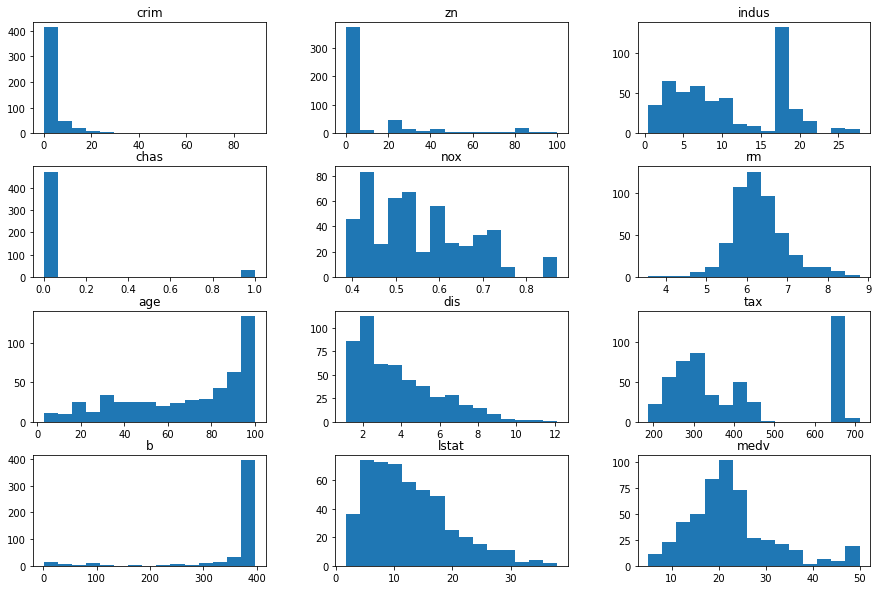

In [71]:
df[['crim', 'zn', 'indus', 'chas','nox','rm','age','dis','tax','b','lstat','medv']].hist(
    bins=15,
    figsize=(15, 10),
    grid = False,
    # rwidth = 2.9,
)
plt.show()

Text(0.5, 1.0, 'Boston Housing Heatmap')

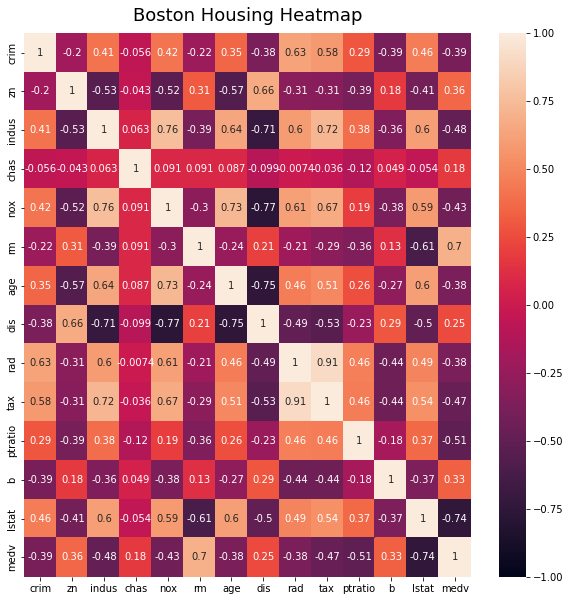

In [72]:

plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Boston Housing Heatmap', fontdict = {'fontsize' : 18}, pad = 12)

In [73]:
scaled_boston = df.copy()

**K Fold Validation For Linear Regression**

In [24]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f) " % (results.mean(), results.std()))
print("The Actual result  - {}". format(results))

MAE: -37.132 (23.092) 
The Actual result  - [-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]


In [18]:
X = scaled_boston.iloc[:, :-1].values
y = scaled_boston.iloc[:, -1].values

Data **Split**

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Linear_Regression**

In [36]:
from sklearn.linear_model import LinearRegression

# Creating and training model
lm = LinearRegression()
lm.fit(X_train, y_train)

# prediction on test data
y_pred = lm.predict(X_test)
r2 = lm.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

In [37]:
# Cross Validation Score
cv_lm = cross_val_score(estimator = lm, X = X_train, y = y_train, cv = 10)

# R-squared formula
lm_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
lm_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
lm_R2 = lm.score(X_test, y_test)
lmCV_R2 = cv_lm.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( lm.score(X_test, y_test),4) )
print('Adjusted R2:', round(lm_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_lm.mean(),4) )

RMSE: 4.6387
R2: 0.7112
Adjusted R2: 0.684
Cross Validated R2:  0.6875


Text(0.5, 1.0, 'Linear regression')

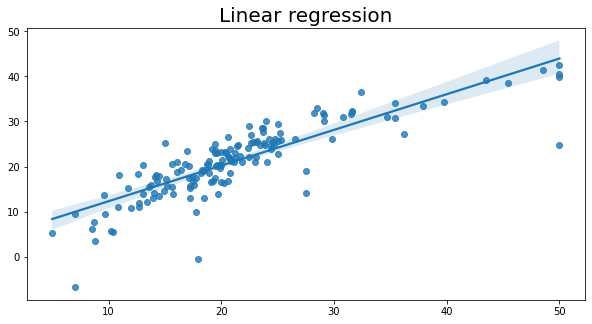

In [38]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Linear regression', fontsize = 20)

Random Forest **Regresssion**

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Creating and training model
RandomForest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
RandomForest_reg.fit(X_train, y_train)
y_pred = RandomForest_reg.predict(X_test)

In [40]:
# Cross Validation Score
cv_rf = cross_val_score(estimator = RandomForest_reg, X = X_train, y = y_train, cv = 10)

# Calculating R-squared
r2 = RandomForest_reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

# Adjusted R-squared formula
rf_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rf_R2 = RandomForest_reg.score(X_test, y_test)
rfCV_R2 = cv_rf.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( RandomForest_reg.score(X_test, y_test),4) )
print('Adjusted R2:', round(rf_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_rf.mean(),4) )

RMSE: 3.3386
R2: 0.8504
Adjusted R2: 0.8363
Cross Validated R2:  0.8162


Text(0.5, 1.0, 'Random forest regression ')

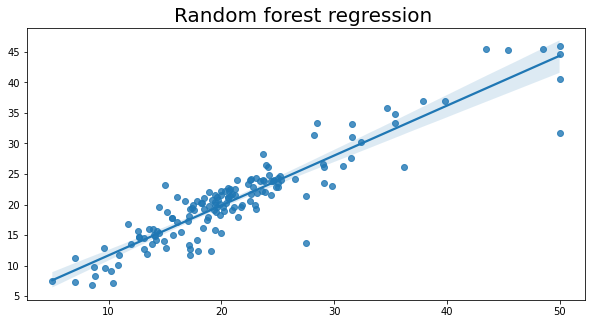

In [41]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Random forest regression ', fontsize = 20)

In [42]:
models = [('Linear Regression', lm_RMSE, lm_R2, lm_adjusted_r2, lmCV_R2),
          ('Random Forest Regressor', rf_RMSE, rf_R2, rf_adjusted_r2, rfCV_R2)  
         ]
predictions = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2 Score', 'Adjusted R2 Score', 'Cross Validated R2 Score'])
predictions

,Model,RMSE,R2 Score,Adjusted R2 Score,Cross Validated R2 Score
0,Linear Regression,4.638690,0.711226,0.684023,0.687535
1,Random Forest Regressor,3.338627,0.850410,0.836318,0.816168


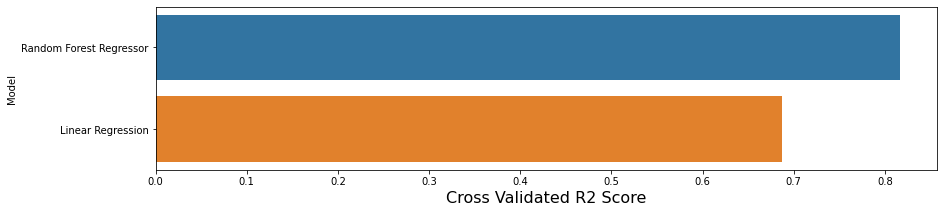

In [74]:
f, axe = plt.subplots(1,1, figsize=(14,3))
predictions.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)
sns.barplot(x='Cross Validated R2 Score', y='Model', data = predictions, ax = axe)
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
plt.show()